In [124]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Build a regression model.

Provide model output and an interpretation of the results. 

In [125]:
# Load databse
db_path = r'C:\Users\CFS\Desktop\Data analysis\Python\Project_ Statistical-Modelling-with-Python\Statistical-Modelling-with-Python\data\city_bikes_yelp.db'
conn = sqlite3.connect(db_path)

# Write the SQL query
sql_query = 'SELECT * FROM python_project'

# Load data from the SQLite database into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()
df

,station_name,empty_slots,free_bikes,latitude,longitude,station_id,bars_restaurants,rating,price,distance,review_count,yelp_id
0,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg
1,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Saku,4.5,2.0,178.845344,226,XAH2HpuUUtu7CUO26pbs4w
2,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,4.0,2.0,191.044234,224,nkDZY5xqihF3XtZMzzfqqg
3,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,4.0,2.0,102.329817,286,NensKn1MSVU_rm-1Y6WlFA
4,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Uma Sushi,4.5,3.0,152.157897,114,4118Aq9LbkvUr4s719uUkA
...,...,...,...,...,...,...,...,...,...,...,...,...
4324,Highbury & 8th,18,1,49.265442,-123.187738,cc25ae4f093b33ba0afd1dbc0dd20324,The Eatery,3.5,2.0,517.176964,517,SlJaxcUyUwjoBjANzs34Og
4325,Highbury & 8th,18,1,49.265442,-123.187738,cc25ae4f093b33ba0afd1dbc0dd20324,Hitoe Sushi Japanese Restaurant,4.0,2.0,744.999190,176,FmD4x9ClmSzSLKOTV7jfXw
4326,Highbury & 8th,18,1,49.265442,-123.187738,cc25ae4f093b33ba0afd1dbc0dd20324,Nuba in Kitsilano,3.5,2.0,990.094446,163,C_ApTM9kMvNfIzOy__jksQ
4327,Highbury & 8th,18,1,49.265442,-123.187738,cc25ae4f093b33ba0afd1dbc0dd20324,Aphrodite's Organic Pie Shop,3.5,2.0,456.914922,259,mROKrBThkXlv_Xo__OTOmQ


In [126]:
# Compute mean values for selected columns, grouping by 'station_id'
grouped = df.groupby('station_id')[['rating', 'price', 'distance', 'review_count']].mean().reset_index()

# Rename the aggregated columns
grouped.rename(columns={'rating': 'mean_rating','price': 'mean_price','distance': 'mean_distance','review_count': 'mean_review_count'}, inplace=True)

# Merge this back with the original DataFrame to include all other columns
df1 = pd.merge(df.drop(['rating', 'price', 'distance', 'review_count'], axis=1).drop_duplicates(subset=['station_id']), grouped, on='station_id')
df1.head()


,station_name,empty_slots,free_bikes,latitude,longitude,station_id,bars_restaurants,yelp_id,mean_rating,mean_price,mean_distance,mean_review_count
0,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,6iOAgzJ0DRZNSKA3FSrrOg,3.941176,2.117647,277.604898,280.058824
1,Yaletown-Roundhouse Station,5,11,49.274566,-123.121817,32603a87cfca71d0f7dfa3513bad69d5,The Flying Pig,NdEPf2Ls5Ql3_nkwjqKvXA,4.052632,2.526316,187.660515,492.526316
2,Dunsmuir & Beatty,10,16,49.279764,-123.110154,6d42fa40360f9a6b2bf641c7b8bb2862,Fanny Bay Oyster Bar & Shellfish Market,Ufhxnrt_OJu4jHfVTP3aRQ,4.175000,2.350000,386.566559,708.550000
3,12th & Yukon (City Hall),12,4,49.260599,-123.113504,66f873d641d448bd1572ab086665a458,La Taqueria Pinche Taco Shop,6iOAgzJ0DRZNSKA3FSrrOg,3.964286,2.142857,364.100800,300.714286
4,8th & Ash,14,2,49.264215,-123.117772,485d4d24c803cfde829ab89699fed833,Saku,XAH2HpuUUtu7CUO26pbs4w,3.916667,2.111111,290.075665,267.000000


In [127]:
df1.describe()

,empty_slots,free_bikes,latitude,longitude,mean_rating,mean_price,mean_distance,mean_review_count
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,10.089796,8.228571,49.271867,-123.117509,4.015483,2.177594,515.516381,346.806145
std,6.318729,4.787792,0.011765,0.030170,0.182079,0.240752,204.224691,167.406635
min,0.000000,0.000000,49.238105,-123.209176,2.750000,1.466667,106.065059,38.000000
25%,6.000000,5.000000,49.263518,-123.136972,3.941176,2.000000,358.509879,213.111111
50%,9.000000,8.000000,49.271377,-123.117772,4.033333,2.150000,493.616608,292.631579
75%,13.000000,11.000000,49.280852,-123.097978,4.117647,2.315789,656.314594,475.631579
max,39.000000,27.000000,49.302577,-123.035969,4.325000,2.850000,1148.640472,776.947368


In [128]:
# Multivariable regression to predict a dependent 'free_bikes' variable based on multiple independent variables

X = df1[['mean_rating', 'mean_price', 'mean_distance', 'mean_review_count']]
y = df1['free_bikes']  

# Add a constant to the independent variable
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.692
Date:                Mon, 25 Sep 2023   Prob (F-statistic):            0.00116
Time:                        01:35:05   Log-Likelihood:                -721.60
No. Observations:                 245   AIC:                             1453.
Df Residuals:                     240   BIC:                             1471.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1994      7.80

The R-squared value is 0.073, which is close to zero. This suggests that only about 7.3% of the variability in free_bikes is explained by model and it shows a poor fit to the data. We want a higher R-squared value.

Simple Linear Regression Model for mean_rating
                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.640
Date:                Mon, 25 Sep 2023   Prob (F-statistic):            0.00615
Time:                        01:35:06   Log-Likelihood:                -727.03
No. Observations:                 245   AIC:                             1458.
Df Residuals:                     243   BIC:                             1465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
con

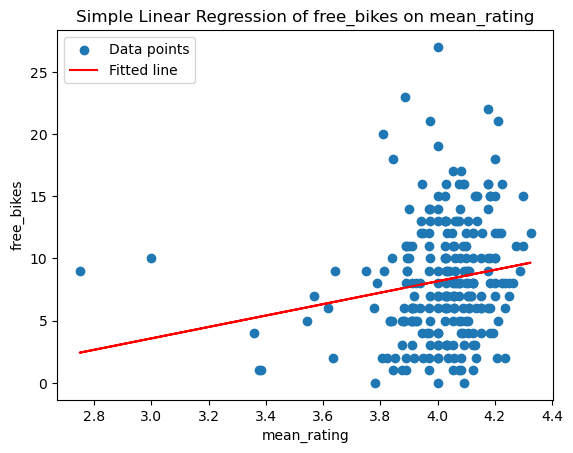

Simple Linear Regression Model for mean_price
                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.177
Date:                Mon, 25 Sep 2023   Prob (F-statistic):             0.0136
Time:                        01:35:14   Log-Likelihood:                -727.75
No. Observations:                 245   AIC:                             1460.
Df Residuals:                     243   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

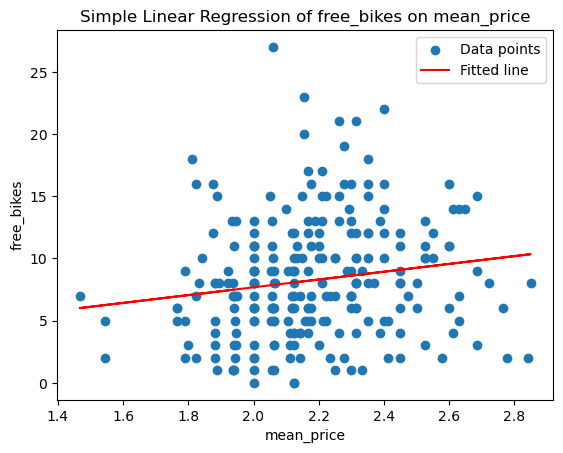

Simple Linear Regression Model for mean_distance
                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1341
Date:                Mon, 25 Sep 2023   Prob (F-statistic):              0.715
Time:                        01:35:14   Log-Likelihood:                -730.76
No. Observations:                 245   AIC:                             1466.
Df Residuals:                     243   BIC:                             1473.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

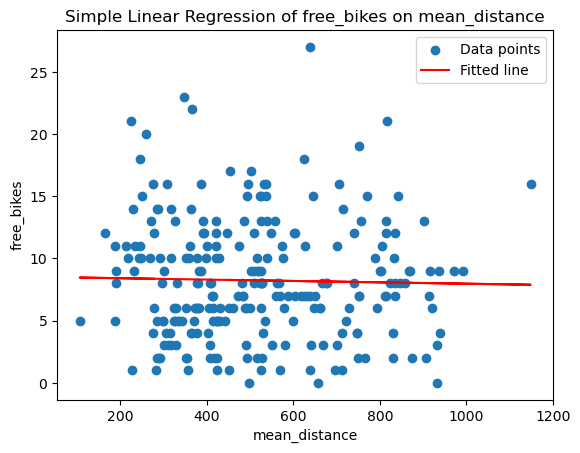

Simple Linear Regression Model for mean_review_count
                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.16
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           4.75e-05
Time:                        01:35:21   Log-Likelihood:                -722.47
No. Observations:                 245   AIC:                             1449.
Df Residuals:                     243   BIC:                             1456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

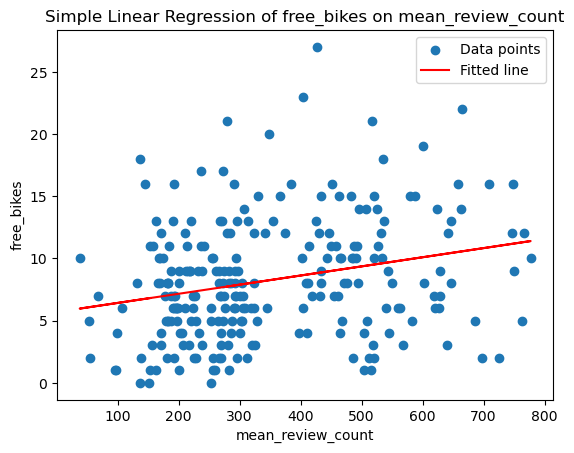

In [129]:
# Simple linear regression to predict a dependent 'free_bikes' variable based on each independent variable
# List of independent variables
independent_vars = ['mean_rating', 'mean_price', 'mean_distance', 'mean_review_count']

# Loop through each independent variable to build a simple linear regression model
for i in independent_vars:
    # Define the independent variable (X) and the dependent variable (y)
    X = df1[[i]]
    y = df1['free_bikes']
    
    # Add a constant to the independent variable
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Print the summary statistics of the regression model
    print(f"Simple Linear Regression Model for {i}")
    print(model.summary())
    
    # Plotting
    plt.figure()
    plt.scatter(df1[i], y, label='Data points')
    plt.plot(df1[i], model.predict(X), color='red', label='Fitted line')
    plt.title(f"Simple Linear Regression of free_bikes on {i}")
    plt.xlabel(i)
    plt.ylabel('free_bikes')
    plt.legend()
    plt.show()

The R-squared value in each of the model outputs above is so low that it still represents a poor fit to the data. We can understand that because the data is not normally distributed, skewness may affect statistical analyses

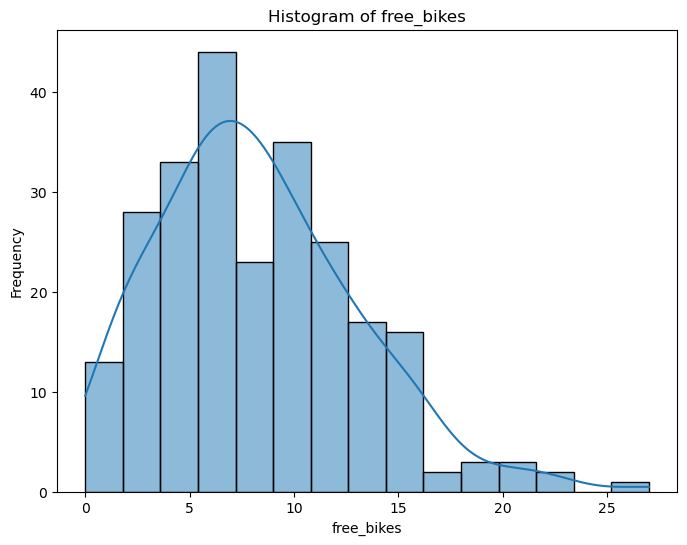

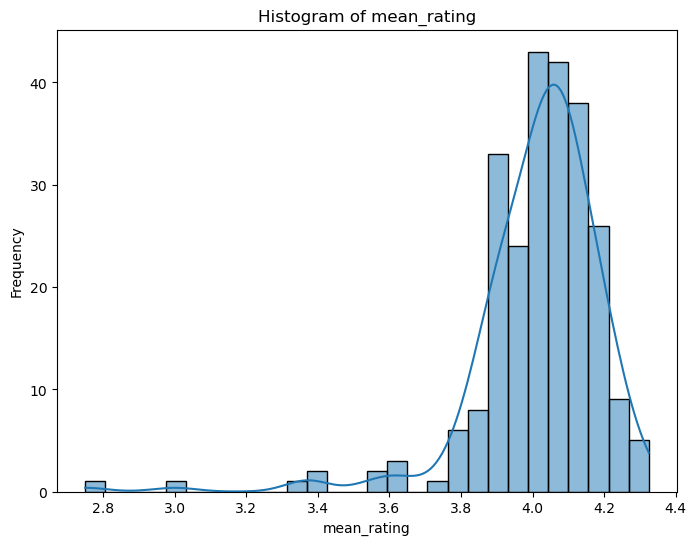

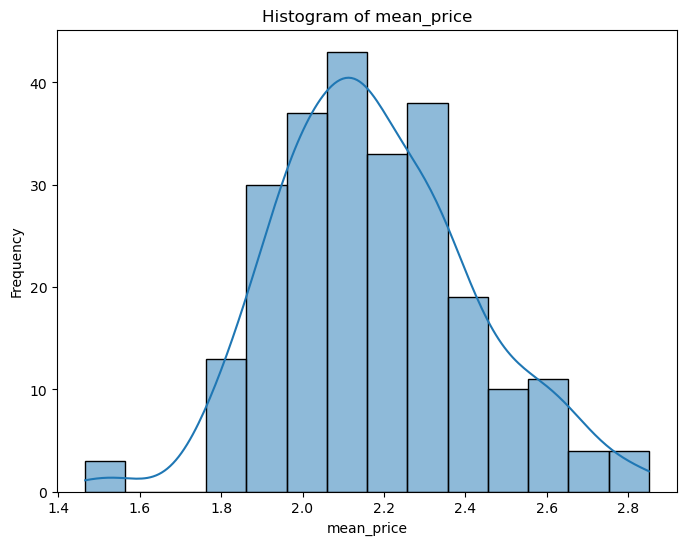

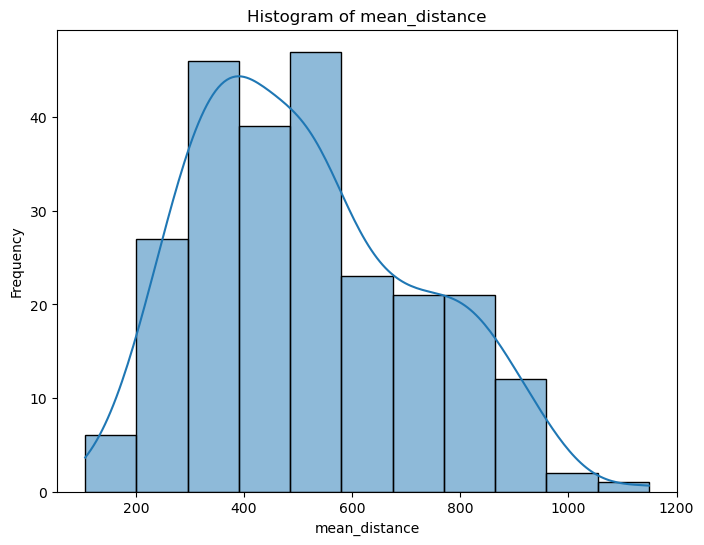

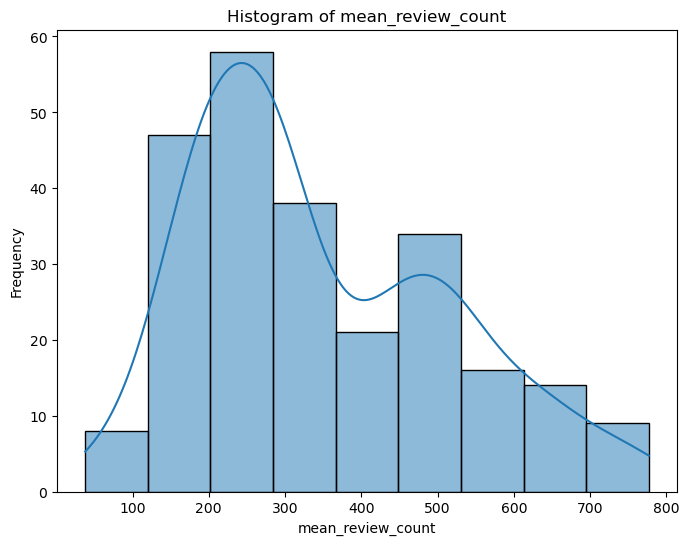

In [130]:
# Plots histograms to understanding the shape, center, and spread of data, as well as for identifying any potential outliers or skewness.

columns_to_plot = ['free_bikes', 'mean_rating', 'mean_price', 'mean_distance', 'mean_review_count']

# Plot histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Transformations to make the dataset more suitable for linear regression

In [131]:
# Log Transformations

df1['log_free_bikes'] = np.log1p(df1['free_bikes'])
df1['log_mean_distance'] = np.log1p(df1['mean_distance'])
df1['log_mean_review_count'] = np.log1p(df1['mean_review_count'])

#Exponential Transformation:
df1['exp_mean_rating'] = np.exp(df1['mean_rating'])

# Create a DataFrame with only the transformed and relevant variables
df_transformed = df1[['exp_mean_rating', 'mean_price', 'log_mean_distance', 'log_mean_review_count']]

# Add a constant 
X = sm.add_constant(df_transformed)

# Dependent variable
y = df1['free_bikes'] 

# Fit the regression model
model = sm.OLS(y, X).fit()

# View the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.850
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           0.000888
Time:                        01:35:24   Log-Likelihood:                -721.30
No. Observations:                 245   AIC:                             1453.
Df Residuals:                     240   BIC:                             1470.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.46

The R-squared value in each of the model outputs above is so low that it still represents a poor fit to the data. 

The F statistic is very close to zero, suggesting that at least one of the predictors are significant. However, given the low R-squared, this may not be very informative.

P-values : 'log_mean_review_count' seems to be the most statistically significant (p-value = 0.008). It suggests that as the 'log_mean_review_count' increases, the number of 'free_bikes' is likely to increase as well. Other variables seem not to be statistically significant (their p-values are much greater than 0.05).

# Stretch

How can you turn the regression model into a classification model?

Instead of predicting the exact number of free_bikes, I will predict whether a station has "Low", "Medium", or "High" numbers of free bikes available.

For example:

Low: free_bikes <= 5
Medium: 5 < free_bikes <= 10
High: free_bikes > 10

In [132]:
def categorize_free_bikes(x):
    if x <= 5:
        return 'Low'
    elif x <= 10:
        return 'Medium'
    else:
        return 'High'

df1['free_bikes_category'] = df1['free_bikes'].apply(categorize_free_bikes)
df1.head()

,station_name,empty_slots,free_bikes,latitude,longitude,station_id,bars_restaurants,yelp_id,mean_rating,mean_price,mean_distance,mean_review_count,log_free_bikes,log_mean_distance,log_mean_review_count,exp_mean_rating,free_bikes_category
0,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,6iOAgzJ0DRZNSKA3FSrrOg,3.941176,2.117647,277.604898,280.058824,2.564949,5.629795,5.638564,51.479129,High
1,Yaletown-Roundhouse Station,5,11,49.274566,-123.121817,32603a87cfca71d0f7dfa3513bad69d5,The Flying Pig,NdEPf2Ls5Ql3_nkwjqKvXA,4.052632,2.526316,187.660515,492.526316,2.484907,5.239949,6.201576,57.548702,High
2,Dunsmuir & Beatty,10,16,49.279764,-123.110154,6d42fa40360f9a6b2bf641c7b8bb2862,Fanny Bay Oyster Bar & Shellfish Market,Ufhxnrt_OJu4jHfVTP3aRQ,4.175000,2.350000,386.566559,708.550000,2.833213,5.959888,6.564631,65.039840,High
3,12th & Yukon (City Hall),12,4,49.260599,-123.113504,66f873d641d448bd1572ab086665a458,La Taqueria Pinche Taco Shop,6iOAgzJ0DRZNSKA3FSrrOg,3.964286,2.142857,364.100800,300.714286,1.609438,5.900173,5.709480,52.682626,Low
4,8th & Ash,14,2,49.264215,-123.117772,485d4d24c803cfde829ab89699fed833,Saku,XAH2HpuUUtu7CUO26pbs4w,3.916667,2.111111,290.075665,267.000000,1.098612,5.673583,5.590987,50.232723,Low
